<a href="https://colab.research.google.com/github/rushikeshnakhate/PortfoliOpt/blob/master/expected_return_df_visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import yfinance as yf
import pandas as pd
import numpy as np
from pathlib import Path
import os
output_dir = Path("/content/drive/MyDrive/")
import matplotlib.pyplot as plt
# !pip install tqdm
# !pip install PyPortfolioOpt
# !pip install tabulate
# !pip install dtale
# !pip install -q data-table
import scipy.optimize as sci_opt
from tqdm import tqdm  # Import the tqdm progress b
from google.colab import data_table

In [11]:
optimization_pkl_filepath = os.path.join(output_dir, "optimization.pkl")
post_processing_wright_pkl_filepath = os.path.join(output_dir, "post_processing_wright.pkl")
performance_pkl_filepath = os.path.join(output_dir, "performance.pkl")
data_pkl_filepath = os.path.join(output_dir, "data.pkl")
expected_return_pkl_filepath = os.path.join(output_dir, "expected_return.pkl")

In [12]:
start_date = '2024-01-01'
end_date = '2024-01-30'
previous_end_date = '2024-01-29'
data = pd.read_pickle(data_pkl_filepath)
expected_return_df = pd.read_pickle(expected_return_pkl_filepath)
optimized_df = pd.read_pickle(optimization_pkl_filepath)
post_processing_wright_df = pd.read_pickle(post_processing_wright_pkl_filepath)
performance_df = pd.read_pickle(performance_pkl_filepath)

In [13]:
# from google.colab import data_table
# data_table.DataTable(expected_return_df.head())

# # Assuming df is your DataFrame
# def clean_metadata(value):
#     if isinstance(value, pd.Series):
#         return value.values  # Extract just the values
#     elif isinstance(value, list):
#         return [str(v) for v in value]  # Convert each element to string for clarity
#     return value

# def extract_value(value):
#     # Check if the value is a list and has only one element, then extract it
#     # print(type(value))
#     if isinstance(value, (np.ndarray, list)) and len(value) == 1:
#         return value[0]
#     # elif isinstance(value, tuple) and len(value) >= 2:
#     #   return value[1]
#     return value  # Return the value as-is if not a list

# # Apply this function to every cell in the DataFrame
# df1 = allocation_df.applymap(clean_metadata)
# df = df1.applymap(extract_value)

In [14]:
# data_table.DataTable(optimized_df.head(2))

In [15]:
# data_table.DataTable(allocation_df.head())

In [16]:
# data_table.DataTable(performance_df.head(2))

In [17]:
# data_table.DataTable(expected_return_df)

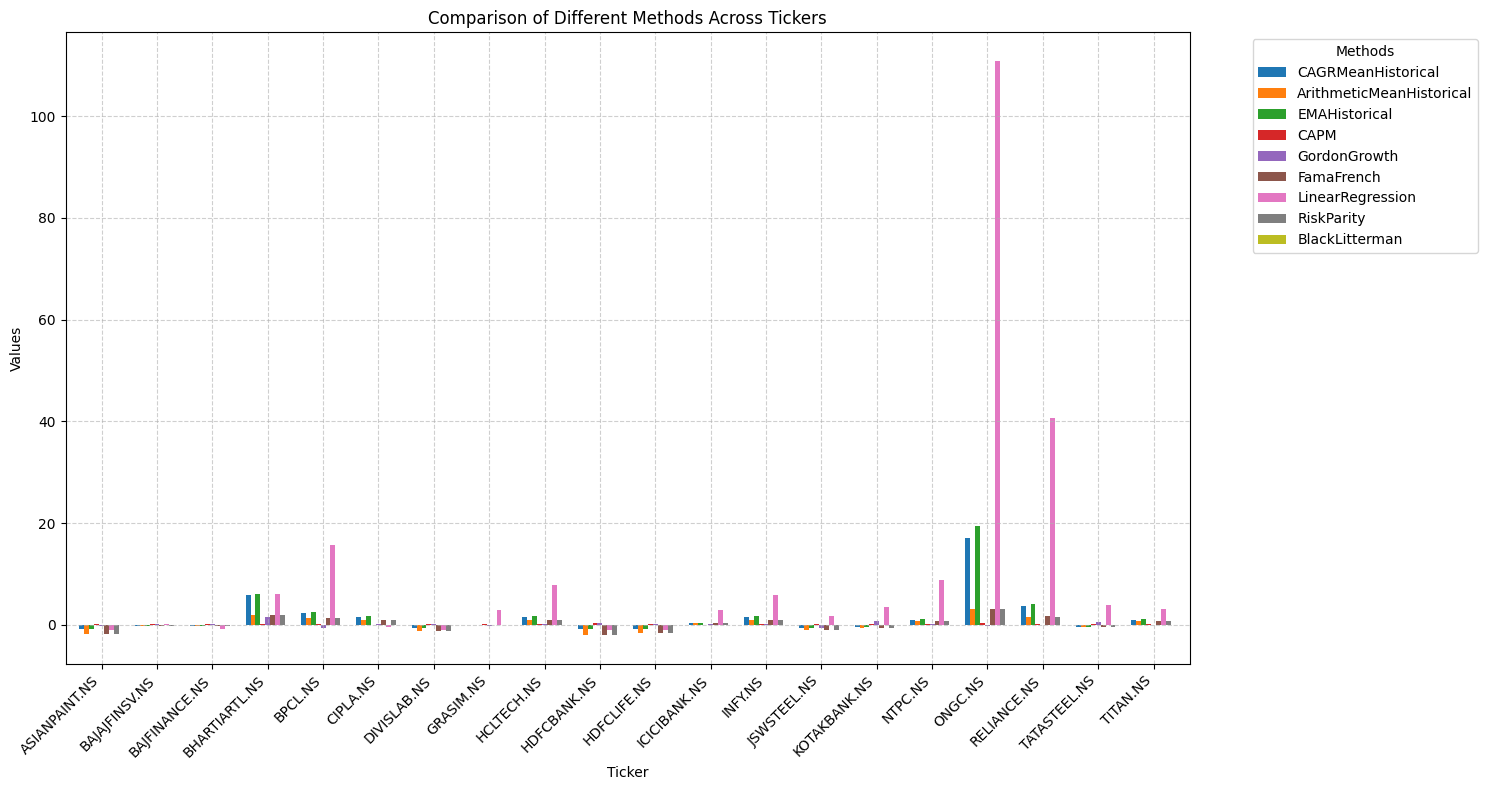

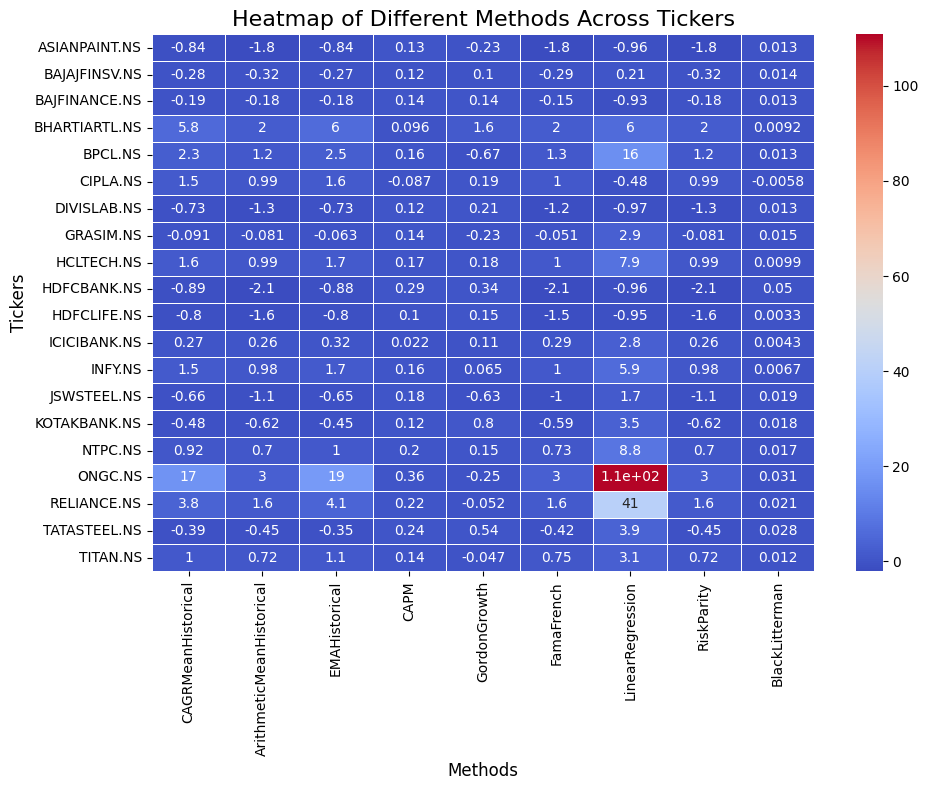

<Figure size 1500x800 with 0 Axes>

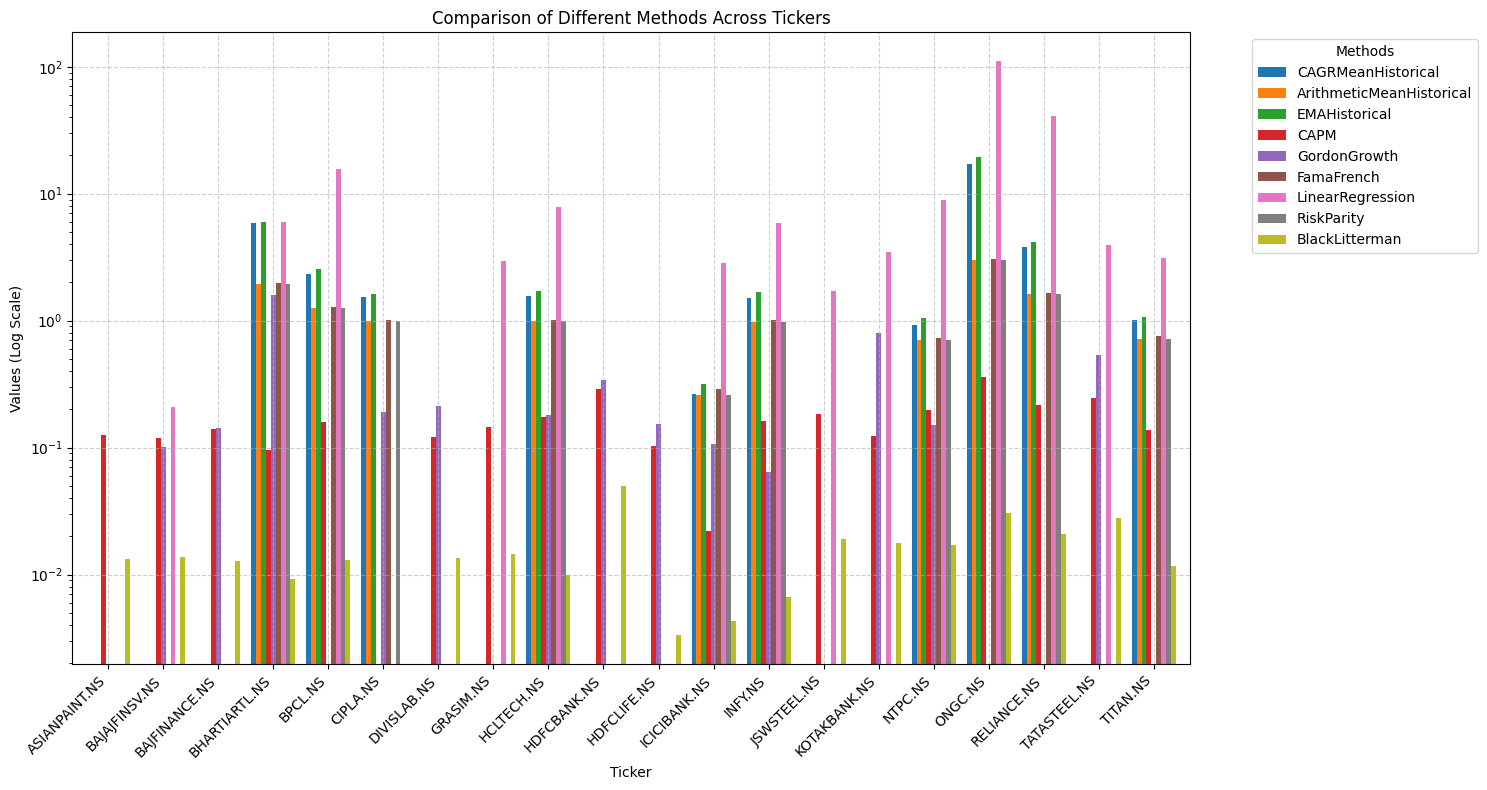

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


def plot_expected_return_df(df):
  # Assuming your DataFrame is named 'df' and 'Ticker' is already set as the index
  # If 'Ticker' is not set as the index, you can uncomment the line below to set it
  # df.set_index('Ticker', inplace=True)

  # Create a grouped bar plot for the columns listed
  ax = df.plot(kind='bar', figsize=(15, 8), width=0.8)

  # Set labels and title
  ax.set_xlabel('Ticker')
  ax.set_ylabel('Values')
  ax.set_title('Comparison of Different Methods Across Tickers')

  # Rotate x-axis labels for better readability
  plt.xticks(rotation=45, ha='right')

  # Add a legend with a title
  plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')

  # Show grid for better readability
  plt.grid(True, linestyle='--', alpha=0.6)

  # Adjust layout to prevent clipping of tick-labels
  plt.tight_layout()

  # Show the plot
  plt.show()


def plot_expected_return_df_heatmap(df):
  # Check the DataFrame
  df['Ticker'] = df.index.tolist()

  # Set figure size
  plt.figure(figsize=(10, 8))

  # Create a heatmap using the original DataFrame without melting
  sns.heatmap(df.set_index('Ticker'), annot=True, cmap='coolwarm', linewidths=0.5)

  # Set labels and title
  plt.title('Heatmap of Different Methods Across Tickers', fontsize=16)
  plt.xlabel('Methods', fontsize=12)
  plt.ylabel('Tickers', fontsize=12)

  # Show plot
  plt.tight_layout()
  plt.show()


import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


def plot_expected_return_df_heatmap_log(df):
  # Sample DataFrame - Replace this with your actual DataFrame
  # Assuming df is already set with Ticker as the index
  # Example: df = pd.read_csv('your_data.csv')

  # Enhanced Bar Plot with Logarithmic Scale
  plt.figure(figsize=(15, 8))
  ax = df.plot(kind='bar', logy=True, figsize=(15, 8), width=0.8)  # Set logy=True for logarithmic scale
  ax.set_xlabel('Ticker')
  ax.set_ylabel('Values (Log Scale)')
  ax.set_title('Comparison of Different Methods Across Tickers')
  plt.xticks(rotation=45, ha='right')
  plt.legend(title='Methods', bbox_to_anchor=(1.05, 1), loc='upper left')
  plt.grid(True, linestyle='--', alpha=0.6)
  plt.tight_layout()
  plt.show()



plot_expected_return_df(expected_return_df)
plot_expected_return_df_heatmap(expected_return_df)
plot_expected_return_df_heatmap_log(expected_return_df)

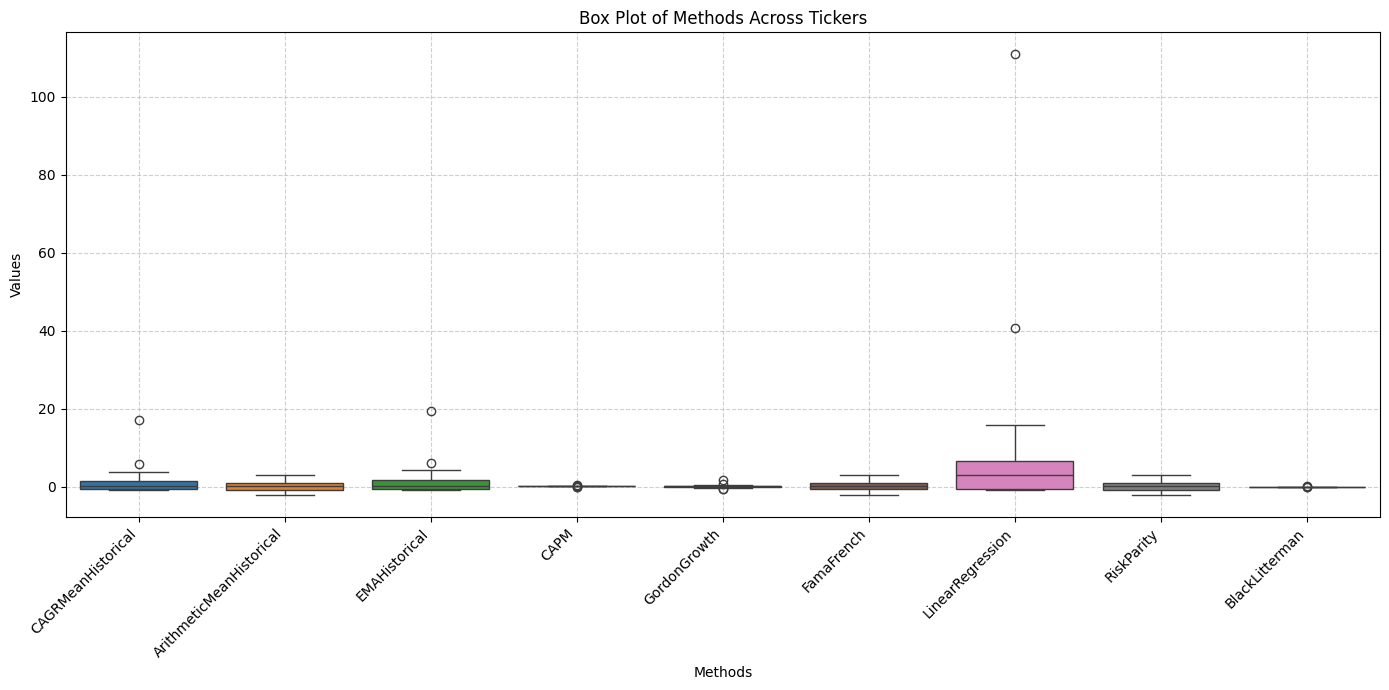

In [20]:
df = expected_return_df
# Box Plot to visualize the spread and identify outliers for each method
plt.figure(figsize=(14, 7))
sns.boxplot(data=df)
plt.title('Box Plot of Methods Across Tickers')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

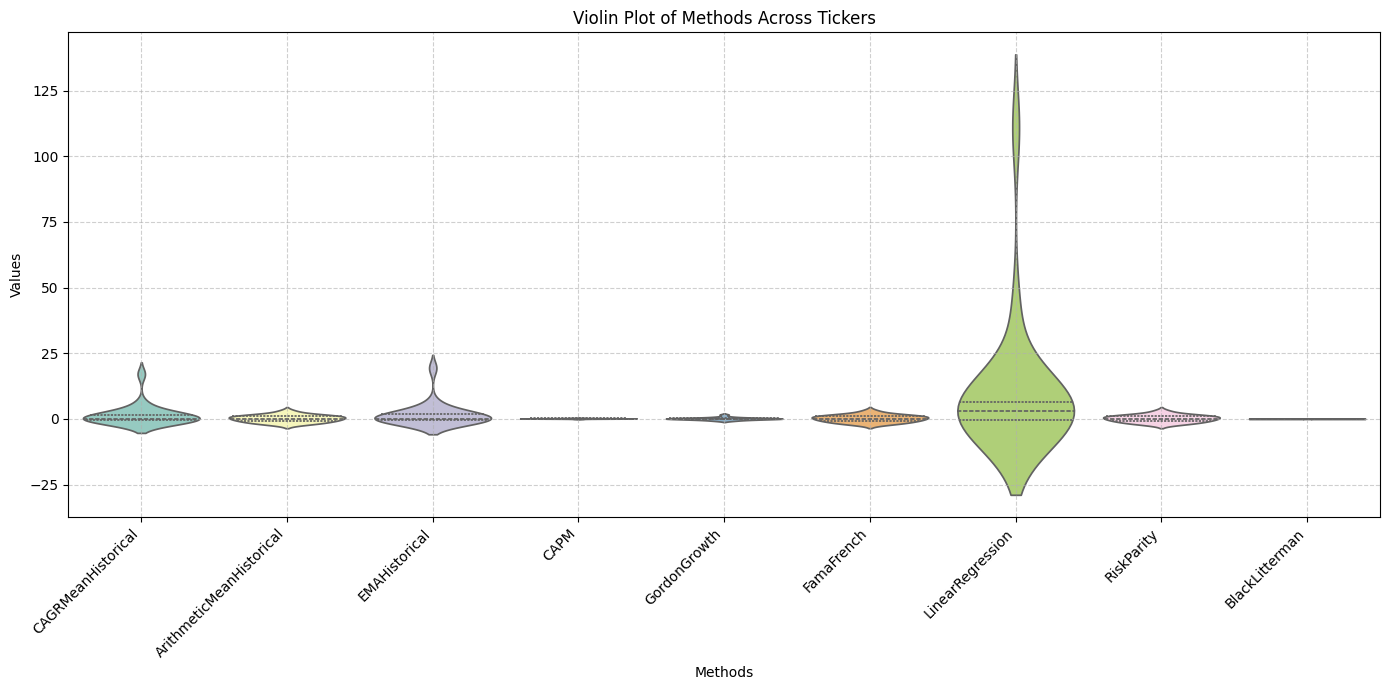

In [21]:
# Violin Plot to see the distribution of values for each method
plt.figure(figsize=(14, 7))
sns.violinplot(data=df, inner="quartile", palette="Set3")
plt.title('Violin Plot of Methods Across Tickers')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 35.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 15.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:3398: UserWarning: 10.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


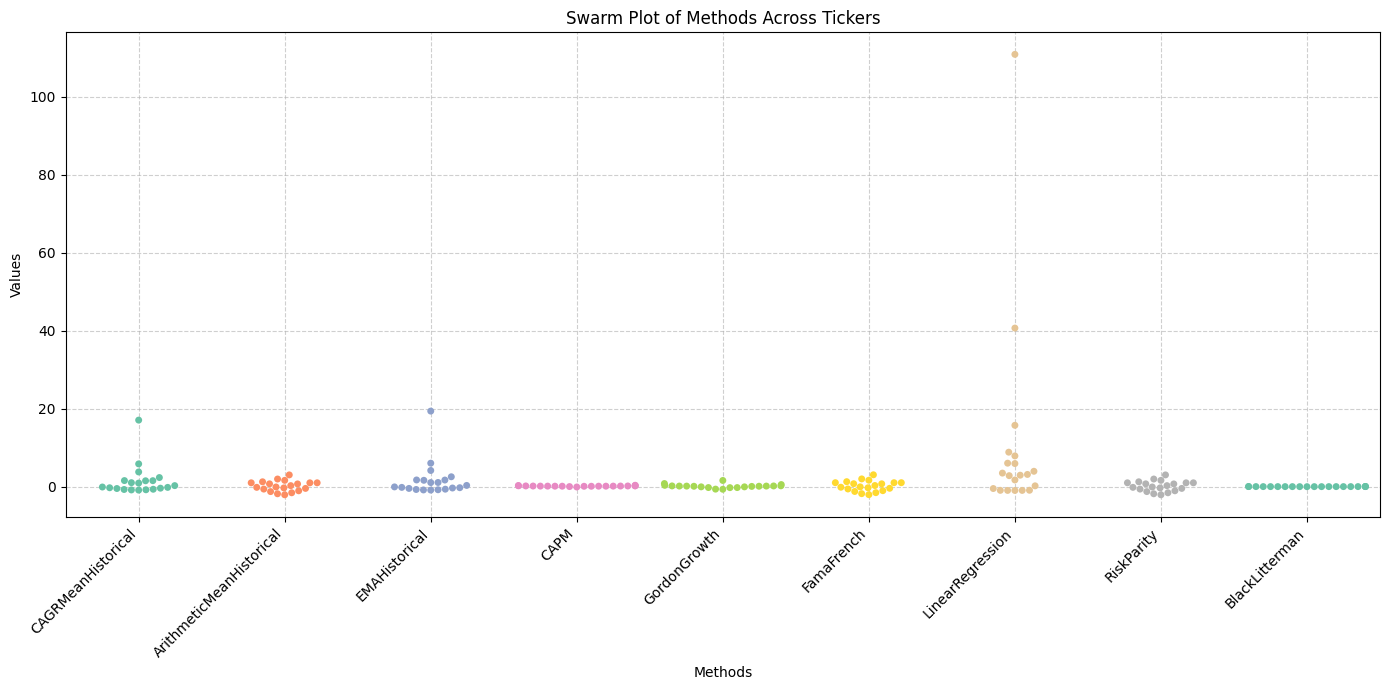

In [22]:
# Swarm Plot to visualize individual values grouped by method
plt.figure(figsize=(14, 7))
sns.swarmplot(data=df, palette="Set2", size=5)
plt.title('Swarm Plot of Methods Across Tickers')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


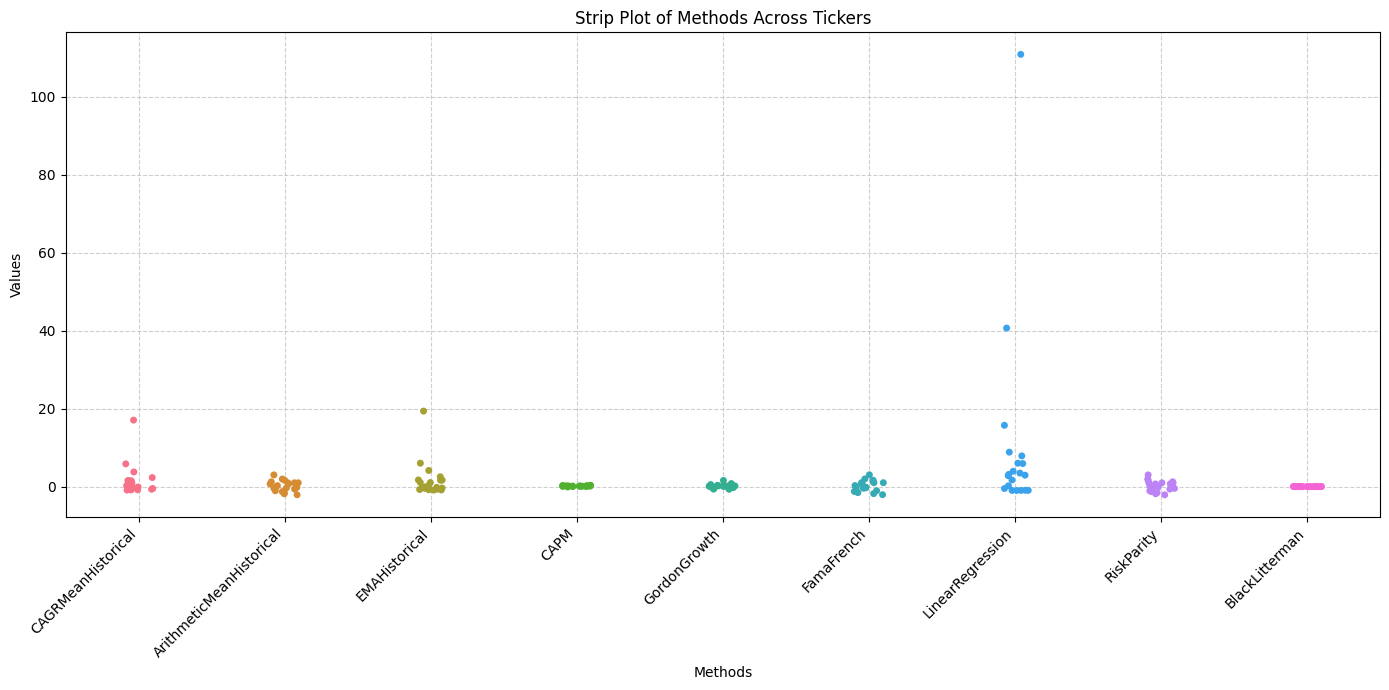

In [23]:
# Strip Plot to show data points distribution for each method
plt.figure(figsize=(14, 7))
sns.stripplot(data=df, jitter=True, palette="husl")
plt.title('Strip Plot of Methods Across Tickers')
plt.xlabel('Methods')
plt.ylabel('Values')
plt.grid(True, linestyle='--', alpha=0.6)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
/usr/local/lib/python3.10/dist-packages/seaborn/axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

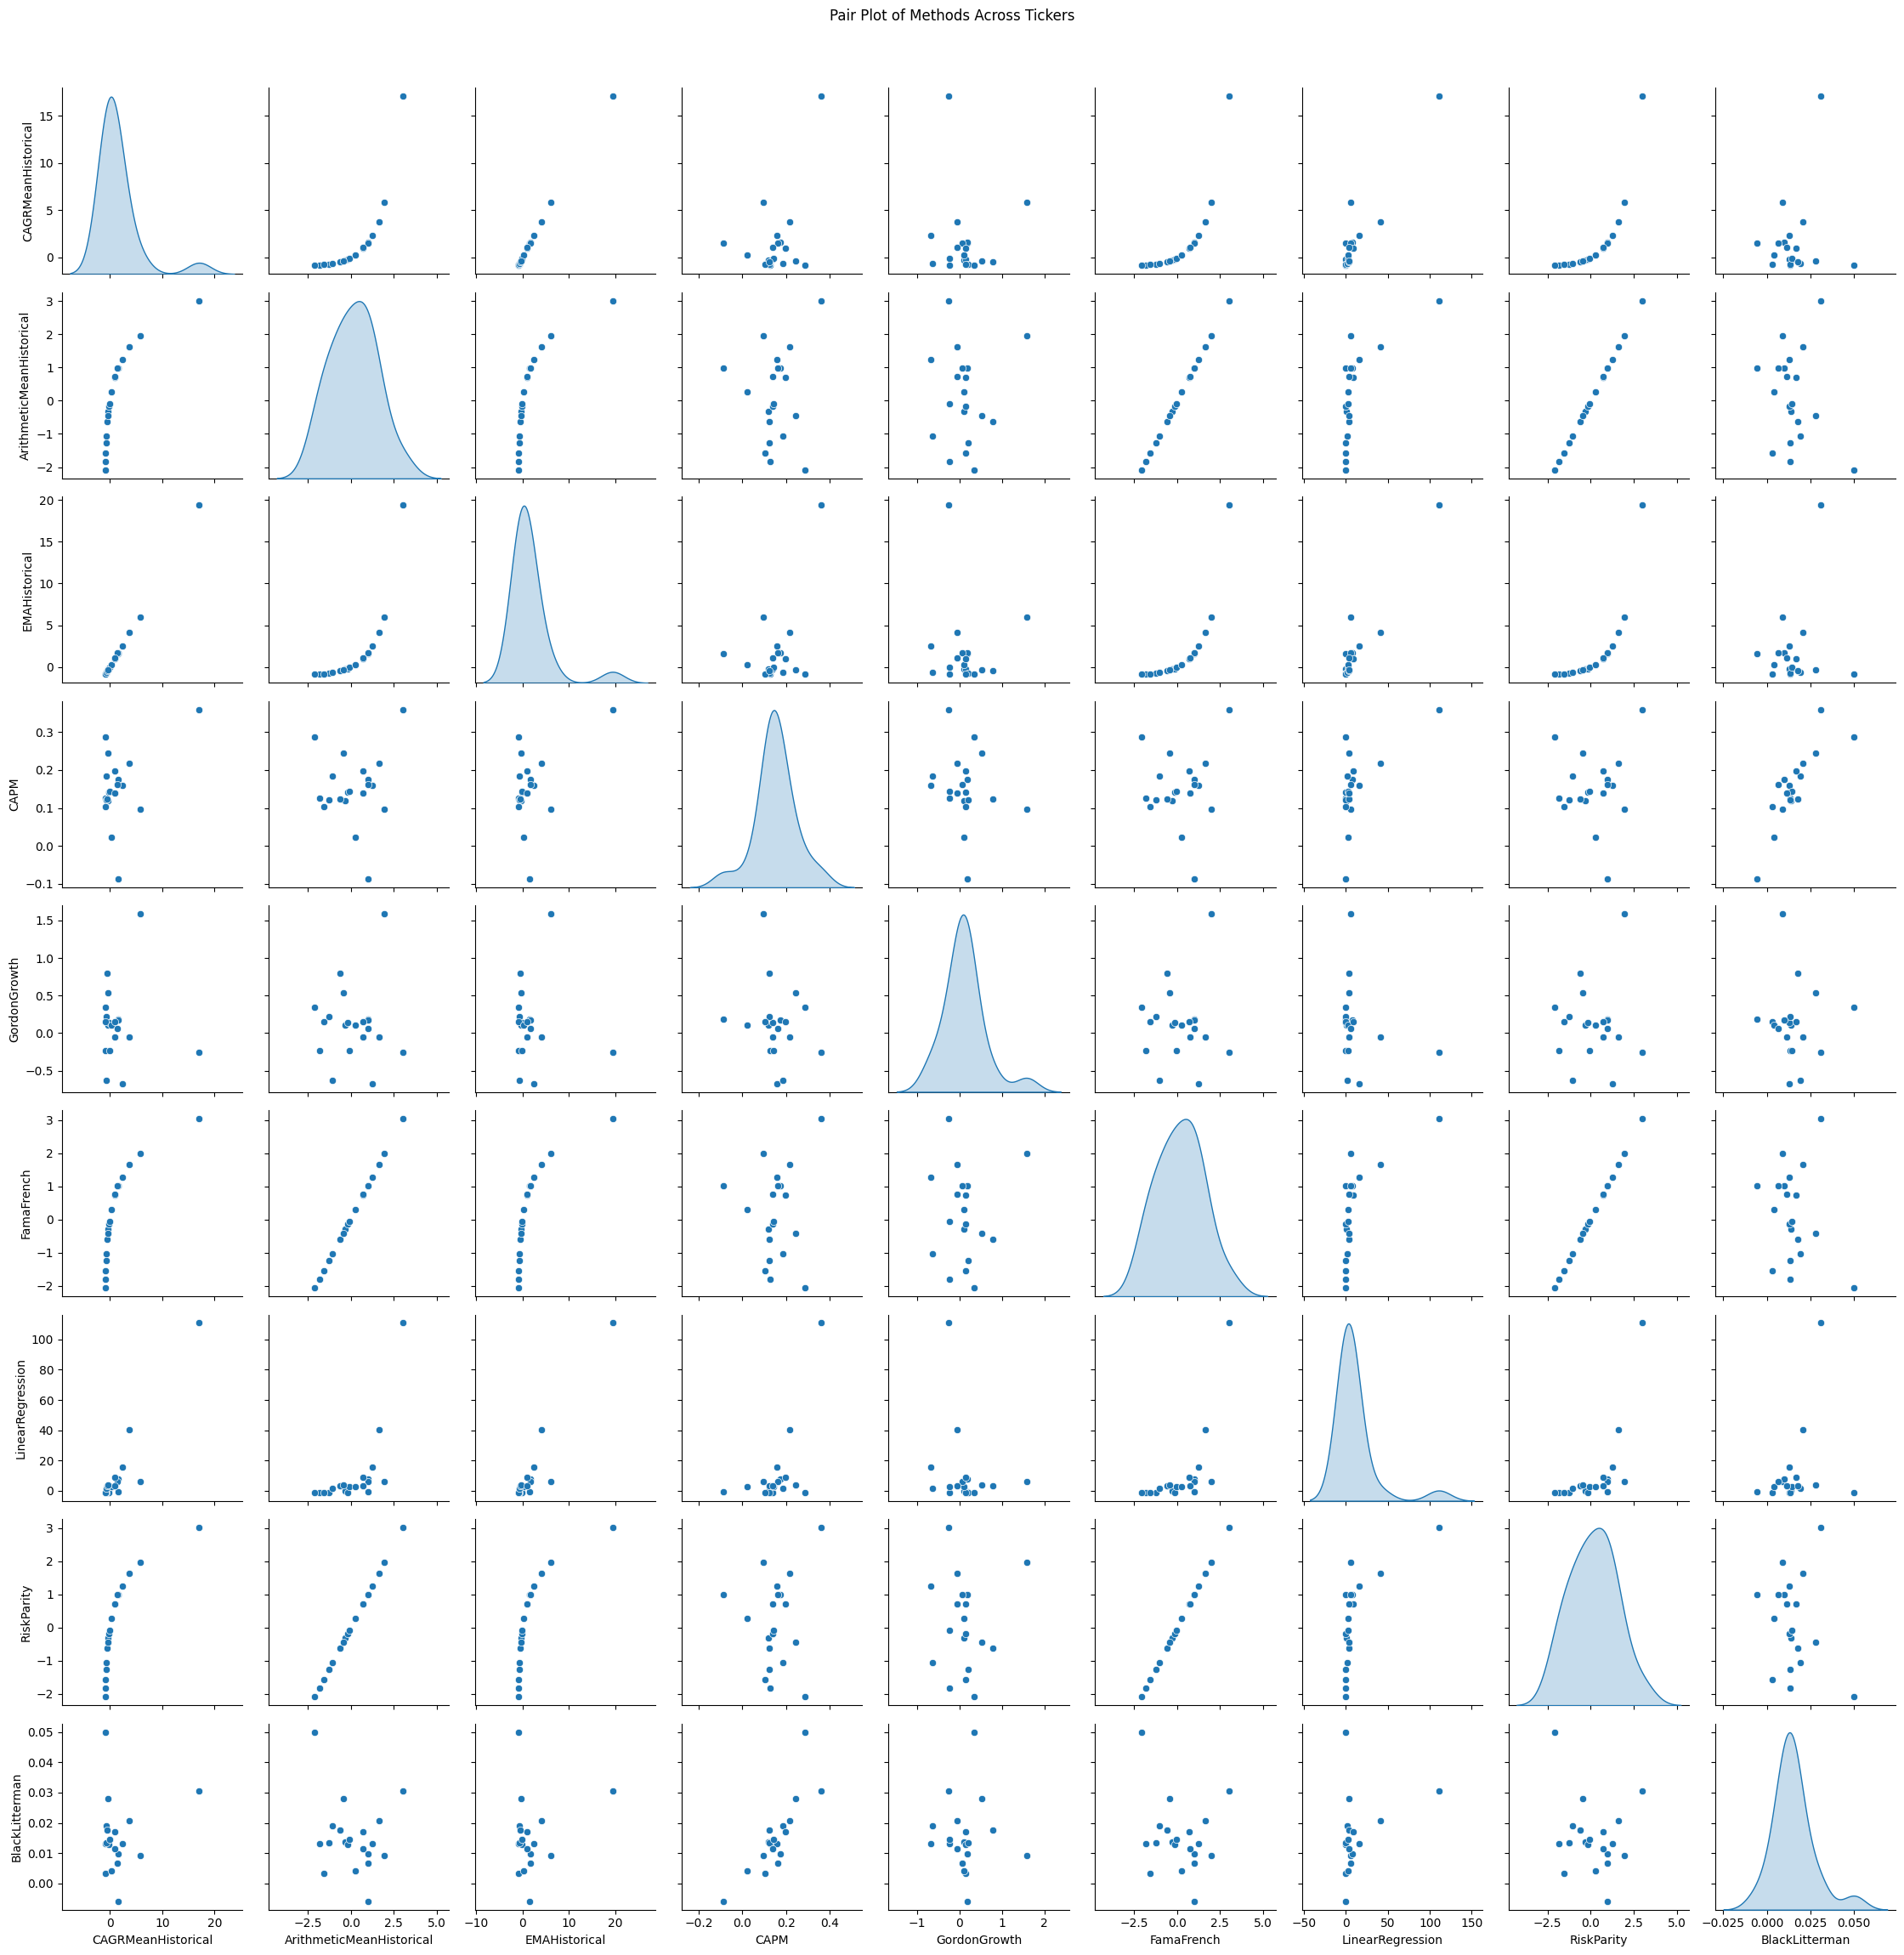

In [24]:
# Pair Plot to explore relationships between different methods
sns.pairplot(df, diag_kind='kde', palette="viridis")
plt.suptitle('Pair Plot of Methods Across Tickers', y=1.02)
plt.tight_layout()
plt.show()


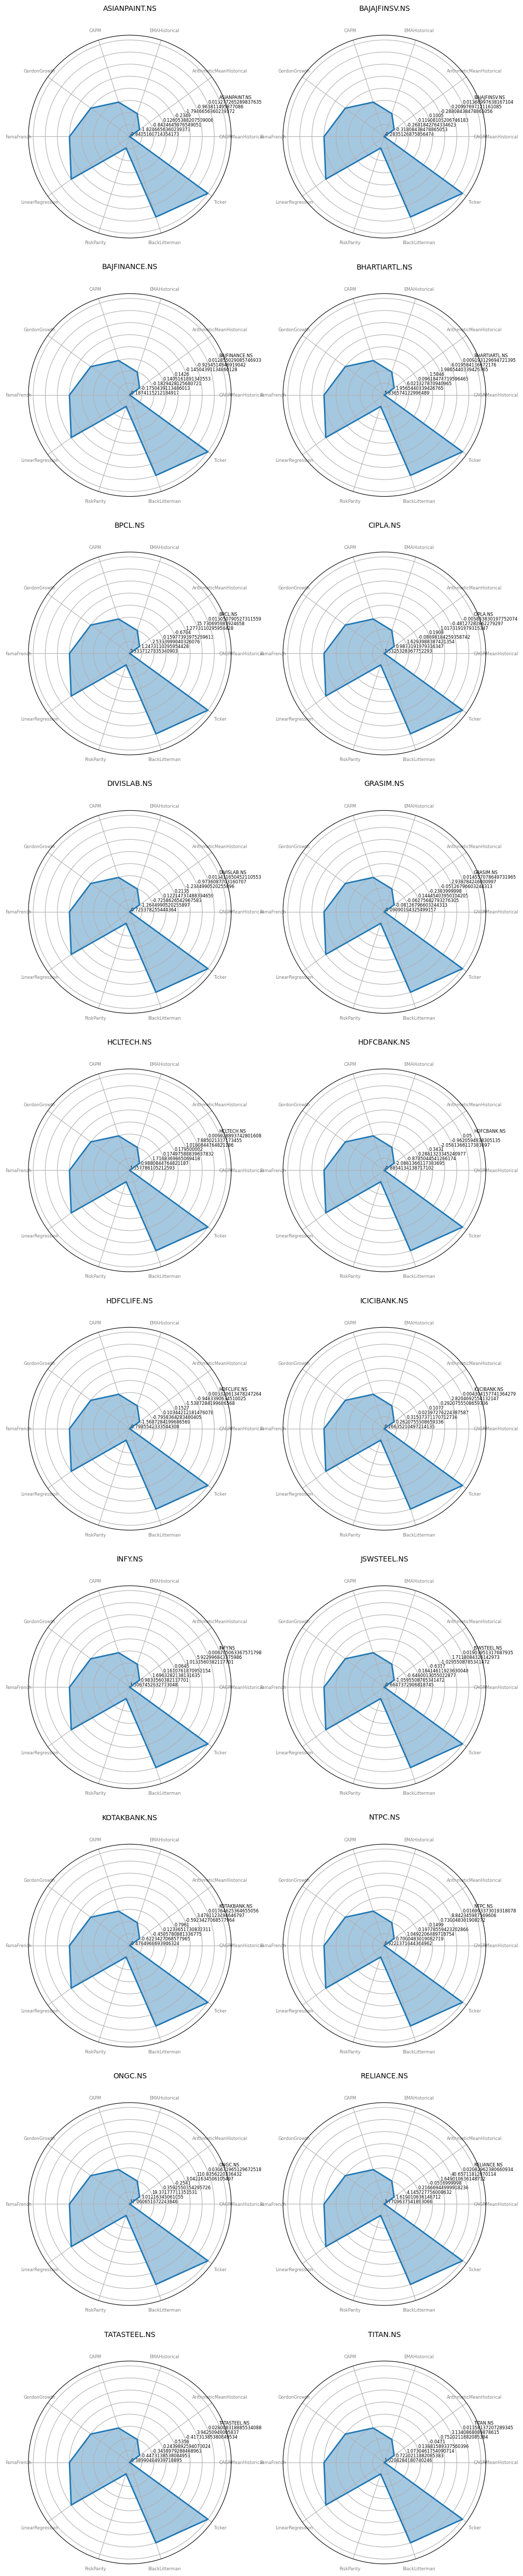

In [34]:
import numpy as np
import matplotlib.pyplot as plt

# Function to create radar plots for all tickers in a grid layout with reduced font size
def radar_plot_grid(data):
    # Define the categories (columns) for the radar plot
    categories = list(data.columns)
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]

    # Define the number of plots per row and calculate the number of rows needed
    num_plots = len(data)
    plots_per_row = 2  # Set to 2 for two plots per row
    num_rows = (num_plots + plots_per_row - 1) // plots_per_row  # Calculate rows based on total plots

    # Setup the figure for multiple radar plots in a grid
    plt.figure(figsize=(plots_per_row * 5, num_rows * 5))  # Adjust size for clarity

    # Loop through each ticker and create a radar plot
    for idx, ticker in enumerate(data.index):
        values = data.loc[ticker].values.flatten().tolist()
        values += values[:1]  # Repeat the first value to close the circular graph

        ax = plt.subplot(num_rows, plots_per_row, idx + 1, polar=True)  # Set the subplot in grid

        # Reduce font size for radar category labels
        plt.xticks(angles[:-1], categories, color='grey', size=6)  # Smaller font for category labels

        # Reduce font size for radial values
        ax.yaxis.set_tick_params(labelsize=6)  # Reduce radial label font size

        ax.plot(angles, values, linewidth=2, linestyle='solid')
        ax.fill(angles, values, alpha=0.4)

        # Reduce font size for title
        plt.title(f'{ticker}', size=10, y=1.1)

    # Adjust layout and display the plot
    plt.tight_layout()
    plt.show()

# Example DataFrame 'df' with tickers and data for radar plot
# Assuming 'df' contains the data with tickers as the index
radar_plot_grid(df)  # Replace 'df' with your actual DataFrame containing tickers and metrics


In [27]:
# # Facet Grid plot to compare values across different subsets of methods
# df_melted = df.reset_index().melt(id_vars=['Ticker'], var_name='Method', value_name='Value')
# g = sns.FacetGrid(df_melted, col="Method", col_wrap=3, height=4, sharey=False)
# g.map_dataframe(sns.barplot, x='Ticker', y='Value', palette='viridis')
# g.set_titles("{col_name}")
# g.set_xticklabels(rotation=45, ha='right')
# g.fig.suptitle('Facet Grid of Methods Across Tickers', y=1.02)
# plt.tight_layout()
# plt.show()


<ipython-input-36-146b70b34342>:40: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


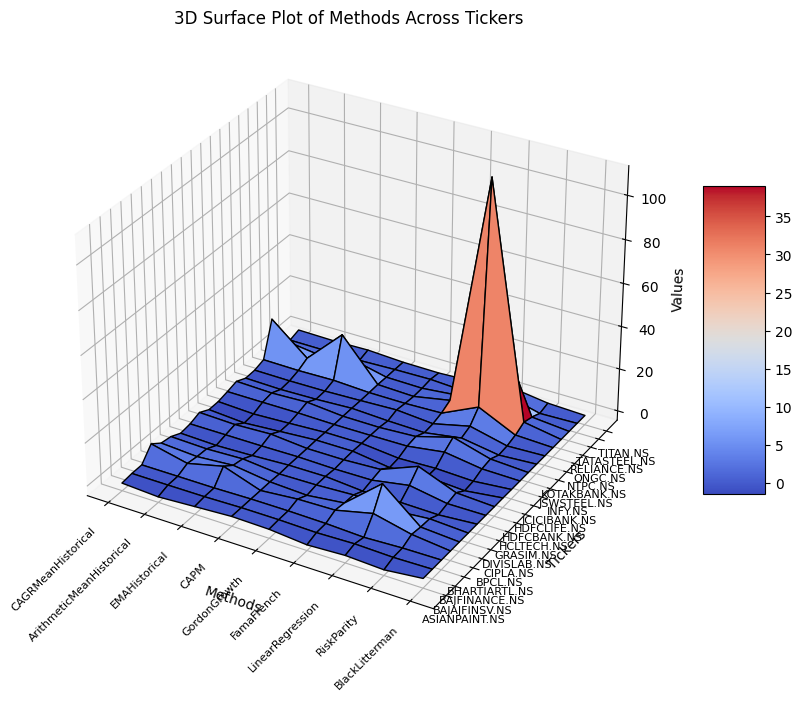

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Assuming `expected_return_df` contains numeric data (like expected return, volatility, etc.)
# Ensure that only numeric columns are used in the DataFrame
numeric_columns = expected_return_df.select_dtypes(include=[np.number])
tickers = expected_return_df.index  # Assuming tickers are the index
methods = numeric_columns.columns  # Assuming methods are the columns

# 3D Surface Plot - visualizing methods, tickers, and values in 3D space
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Create grid for x (methods) and y (tickers)
x = np.arange(len(methods))
y = np.arange(len(tickers))
x, y = np.meshgrid(x, y)

# Use only numeric data for z
z = numeric_columns.values

# Plot the 3D surface
surf = ax.plot_surface(x, y, z, cmap='coolwarm', edgecolor='k')

# Set labels for methods (x-axis) and tickers (y-axis) with reduced font size
ax.set_xticks(np.arange(len(methods)))
ax.set_xticklabels(methods, rotation=45, ha='right', fontsize=8)  # Reduced font size for x-axis
ax.set_yticks(np.arange(len(tickers)))
ax.set_yticklabels(tickers, fontsize=8)  # Reduced font size for y-axis

# Set plot title and axis labels with reduced font size
ax.set_title('3D Surface Plot of Methods Across Tickers', fontsize=12)
ax.set_xlabel('Methods', fontsize=10)
ax.set_ylabel('Tickers', fontsize=10)
ax.set_zlabel('Values', fontsize=10)

# Add color bar
plt.colorbar(surf, shrink=0.5, aspect=5)
plt.tight_layout()
plt.show()
